# Import libraries and add dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import __version__
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
cf.go_offline()
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline

In [2]:
df_raw = pd.read_csv("datasets/DOHMH_HIV_AIDS_Annual_Report.csv", low_memory=False)

# Data exploration

In [3]:
df_raw.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0


In [4]:
df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                6005 non-null   int64  
 1   borough                             6005 non-null   object 
 2   uhf                                 6005 non-null   object 
 3   gender                              6005 non-null   object 
 4   age                                 6005 non-null   object 
 5   race                                6005 non-null   object 
 6   hiv_diagnoses                       6005 non-null   int64  
 7   hiv_diagnosis_rate                  6005 non-null   float64
 8   concurrent_diagnoses                6005 non-null   int64  
 9   pct_linked_to_care_within_3_months  6005 non-null   int64  
 10  aids_diagnoses                      6005 non-null   int64  
 11  aids_diagnosis_rate                 6005 no

In [6]:
df_raw.describe().T

#table_cat = ff.create_table(df_raw.describe().T, index=True, index_title='Numerical columns')
#iplot(table_cat)



,count,mean,std,min,25%,50%,75%,max
year,6005.0,2013.000000,1.414331,2011.0,2012.0,2013.0,2014.0,2015.0
hiv_diagnoses,6005.0,26.494588,130.995148,0.0,0.0,3.0,13.0,3379.0
hiv_diagnosis_rate,6005.0,119.501499,2883.974280,0.0,0.0,18.5,49.4,99999.0
concurrent_diagnoses,6005.0,5.095087,24.492574,0.0,0.0,1.0,3.0,640.0
pct_linked_to_care_within_3_months,6005.0,25399.316403,43470.652710,0.0,67.0,83.0,99999.0,99999.0
aids_diagnoses,6005.0,33.299917,1292.863435,0.0,0.0,2.0,8.0,99999.0
aids_diagnosis_rate,6005.0,122.763697,3159.088051,0.0,0.0,10.4,30.6,99999.0
plwdhi_prevalence,6005.0,317.515254,5616.414102,0.0,0.2,0.6,1.5,99999.0
pct_viral_suppression,6005.0,2655.912073,15846.355601,0.0,71.0,79.0,87.0,99999.0
deaths,6005.0,49.447460,1826.287128,0.0,0.0,1.0,8.0,99999.0


In [7]:
df_cat_cols =  df_raw[['year','borough','uhf','gender','age','race']].columns

print("Catagroical Colomns")
for c in df_cat_cols:
    c_counts = df_raw[c].value_counts()
    print("\n")
    print(c_counts)

Catagroical Colomns


2015    1201
2011    1201
2014    1201
2013    1201
2012    1201
Name: year, dtype: int64


Brooklyn         1500
Manhattan        1375
Queens           1375
Bronx            1000
Staten Island     625
All               130
Name: borough, dtype: int64


All                                     755
Union Square - Lower East Side          125
Gramercy Park - Murray Hill             125
East Flatbush - Flatbush                125
Fordham - Bronx Park                    125
Washington Heights - Inwood             125
East New York                           125
Long Island City - Astoria              125
Fresh Meadows                           125
Willowbrook                             125
Central Harlem - Morningside Heights    125
Jamaica                                 125
Greenwich Village - Soho                125
Bensonhurst - Bay Ridge                 125
Ridgewood - Forest Hills                125
Borough Park                            125
Canarsie - Flatlands

# Data wrangling and checking for Nulls

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


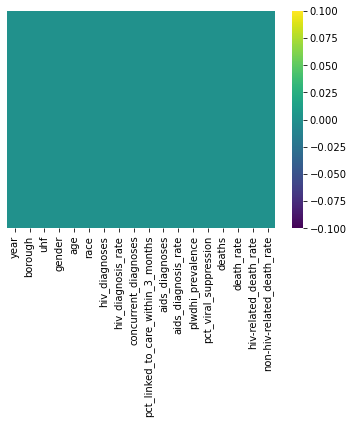

In [8]:
df_raw.isnull()
sns.heatmap(df_raw.isnull(), yticklabels=False, cmap="viridis")


# Data visualization 

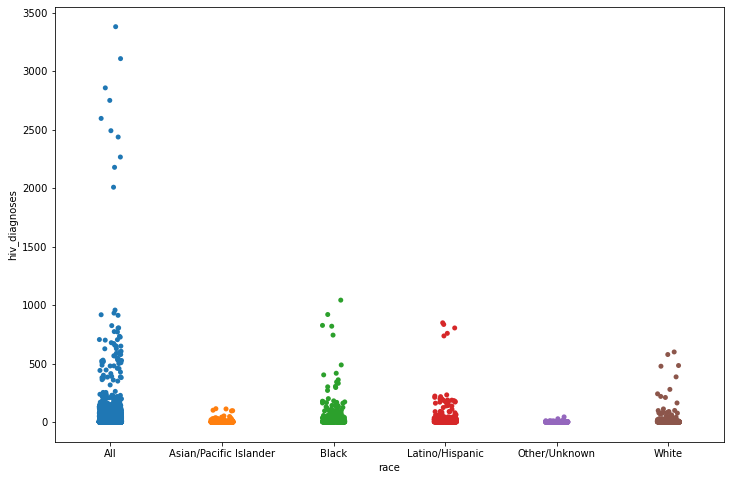

In [9]:
f, ax = plt.subplots(figsize=(12,8))
sns.stripplot(x="race", y="hiv_diagnoses", data=df_raw)

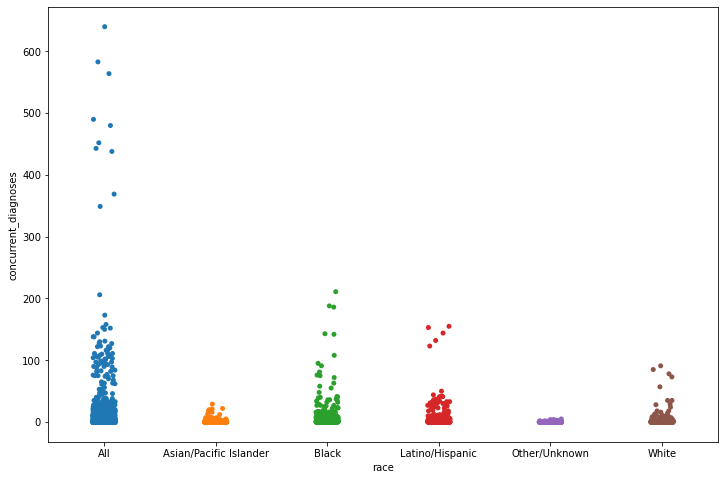

In [10]:
f, ax = plt.subplots(figsize=(12,8))
sns.stripplot(x="race", y="concurrent_diagnoses", data=df_raw)

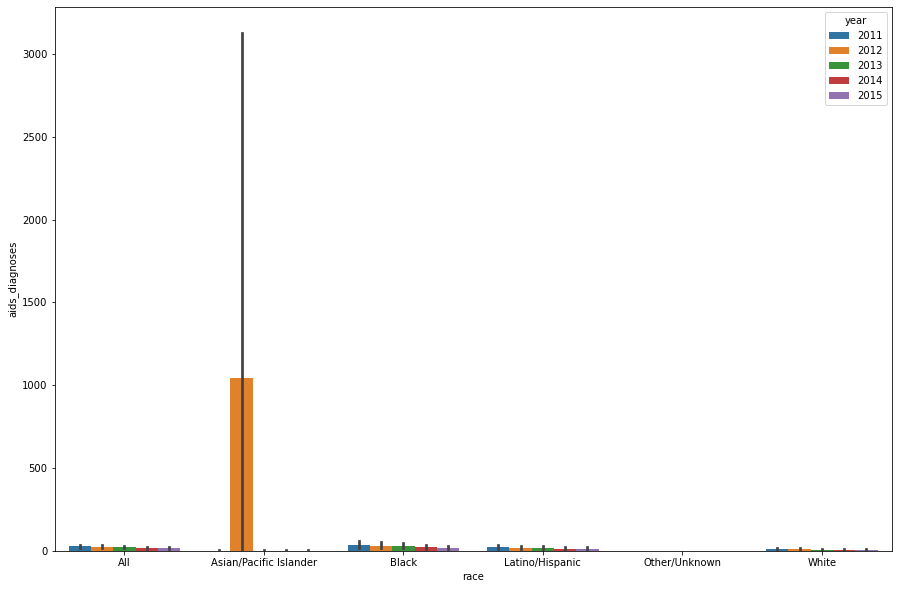

In [11]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="year", data=df_raw)

In [12]:
#df_race

df_race = df_raw.groupby(['year','race'], as_index=False)['aids_diagnoses'].sum().rename(columns={'aids_diagnoses':'tot_aids_diagnoses_by_race'})
df_race 

,year,race,tot_aids_diagnoses_by_race
0,2011,All,19410
1,2011,Asian/Pacific Islander,134
2,2011,Black,3443
3,2011,Latino/Hispanic,2123
4,2011,Other/Unknown,11
5,2011,White,759
6,2012,All,17112
7,2012,Asian/Pacific Islander,100133
8,2012,Black,2991
9,2012,Latino/Hispanic,1782


In [13]:
colnames = ['All', 99999,'na']
df_raw_test =  df_raw.replace(colnames, 'NaN')

In [14]:
df_raw.columns

Index(['year', 'borough', 'uhf', 'gender', 'age', 'race', 'hiv_diagnoses',
       'hiv_diagnosis_rate', 'concurrent_diagnoses',
       'pct_linked_to_care_within_3_months', 'aids_diagnoses',
       'aids_diagnosis_rate', 'plwdhi_prevalence', 'pct_viral_suppression',
       'deaths', 'death_rate', 'hiv-related_death_rate',
       'non-hiv-related_death_rate'],
      dtype='object')

In [15]:
df_all_year = df_raw.query('borough =="All" & uhf=="All" & gender=="All" & age=="All" & race=="All"')

In [16]:
df_all_year

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1201,2012,All,All,All,All,All,3106,44.0,564,67,2106,29.8,1.1,76,1898,11.9,4.7,7.2
2402,2013,All,All,All,All,All,2856,40.1,583,69,1949,27.4,1.1,78,1824,11.1,4.1,7.0
3603,2014,All,All,All,All,All,2749,38.3,490,70,1518,21.2,1.1,81,1751,10.1,3.3,6.8
4804,2015,All,All,All,All,All,2490,34.5,443,71,1307,18.1,1.1,83,1678,9.6,99999.0,99999.0


In [17]:
#Transgender is excluded
df_all_boro = df_raw.query('borough !="All" & uhf=="All" & gender == ("All", "Transgender") & age=="All" & race=="All"') #
df_all_boro.query('borough =="Queens"' )
df_all_boro.groupby(['year','borough','gender'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_boro.groupby(['year'], as_index=False)['hiv_diagnoses'].sum()


,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
801,2011,Queens,All,All,All,All,486,25.1,103,73,305,15.7,0.6,71,191,8.9,3.3,5.6
2002,2012,Queens,All,All,All,All,480,24.6,93,69,283,14.5,0.6,77,151,7.3,3.3,4.0
3205,2013,Queens,All,All,All,All,459,23.3,107,72,282,14.3,0.6,80,160,7.0,2.3,4.7
4405,2014,Queens,All,All,All,All,457,23.0,77,77,196,9.9,0.6,84,165,7.3,2.2,5.1
5605,2015,Queens,All,All,All,All,445,22.2,97,72,236,11.8,0.6,85,158,6.2,99999.0,99999.0


,year,borough,gender,hiv_diagnoses
0,2011,Bronx,All,627
1,2011,Brooklyn,All,931
2,2011,Manhattan,All,824
3,2011,Queens,All,486
4,2011,Staten Island,All,39
5,2012,Bronx,All,566
6,2012,Brooklyn,All,805
7,2012,Manhattan,All,773
8,2012,Queens,All,480
9,2012,Staten Island,All,37


,year,hiv_diagnoses
0,2011,2907
1,2012,2661
2,2013,2453
3,2014,2388
4,2015,2222


In [18]:
df_all_uhf = df_raw.query('borough !="All" & uhf!="All" & gender=="All" & age=="All" & race=="All"')
df_all_uhf.query('uhf =="Rockaway"' )
df_all_uhf.groupby(['year','uhf'], as_index=False)['hiv_diagnoses'].sum()
df_all_uhf.groupby(['year'], as_index=False)['hiv_diagnoses'].sum()

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
976,2011,Queens,Rockaway,All,All,All,26,28.0,13,81,25,26.9,0.9,67,31,23.6,8.7,14.9
2177,2012,Queens,Rockaway,All,All,All,35,37.6,4,46,23,24.7,0.9,74,28,19.7,6.4,13.3
3378,2013,Queens,Rockaway,All,All,All,29,31.2,3,59,15,16.1,0.9,72,20,12.9,4.9,8.1
4579,2014,Queens,Rockaway,All,All,All,28,30.1,5,71,16,17.2,0.9,78,21,12.5,3.2,9.3
5780,2015,Queens,Rockaway,All,All,All,23,24.7,6,52,14,15.1,1.0,79,23,13.6,99999.0,99999.0


,year,uhf,hiv_diagnoses
0,2011,Bayside - Little Neck,6
1,2011,Bedford Stuyvesant - Crown Heights,235
2,2011,Bensonhurst - Bay Ridge,25
3,2011,Borough Park,29
4,2011,Canarsie - Flatlands,67
...,...,...,...
205,2015,Upper West Side,40
206,2015,Washington Heights - Inwood,122
207,2015,West Queens,141
208,2015,Williamsburg - Bushwick,96


,year,hiv_diagnoses
0,2011,2891
1,2012,2645
2,2013,2442
3,2014,2370
4,2015,2216


In [19]:
df_all_gender = df_raw.query('borough =="All" & uhf=="All" & gender!="All" & age=="All" & race=="All"')
df_all_gender #.query('uhf =="Rockaway"' )
df_all_gender.groupby(['year'], as_index=False)['hiv_diagnoses'].sum()

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
1202,2012,All,All,Male,All,All,2436,73.5,438,66,1529,46.1,1.7,77,1326,11.6,4.5,7.1
1203,2012,All,All,Female,All,All,626,17.9,122,70,544,15.4,0.6,73,560,12.6,5.3,7.3
1204,2012,All,All,Transgender,All,All,44,99999.0,4,57,33,99999.0,99999.0,63,12,14.8,9.9,4.9
2403,2013,All,All,Male,All,All,2265,67.7,452,68,1440,43.1,1.7,80,1279,11.0,4.1,6.9
2404,2013,All,All,Female,All,All,546,15.7,127,73,486,13.5,0.6,76,533,11.6,4.4,7.2
2405,2013,All,All,Transgender,All,All,45,99999.0,4,53,23,99999.0,99999.0,66,12,13.5,4.0,9.5
3604,2014,All,All,Male,All,All,2177,64.6,369,71,1087,32.2,1.7,83,1216,9.8,3.1,6.7


,year,hiv_diagnoses
0,2011,3379
1,2012,3106
2,2013,2856
3,2014,2749
4,2015,2490


In [20]:
df_all_age = df_raw.query('borough =="All" & uhf=="All" & gender!="All" & age!="All" & race=="All"')
df_all_age #.query('uhf =="Rockaway"' )
df_all_age.groupby(['year','age'], as_index=False)['hiv_diagnoses'].sum()
df_all_age.groupby(['year'], as_index=False)['hiv_diagnoses'].sum()

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67,96,13.3,0.3,48,19,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66,133,20.3,0.6,61,53,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62,210,35.5,1.4,66,184,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72,133,24.0,1.3,73,231,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68,60,7.1,0.3,81,129,33.5,10.6,22.9
15,2011,All,All,Male,13 - 19,All,140,39.4,7,52,33,9.3,0.1,51,1,1.4,1.4,0.0
16,2011,All,All,Male,20 - 29,All,957,142.1,104,62,370,54.9,0.7,54,47,6.4,3.6,2.8
17,2011,All,All,Male,30 - 39,All,649,105.4,122,67,405,65.7,1.4,67,90,7.1,3.7,3.4
18,2011,All,All,Male,40 - 49,All,517,93.9,138,74,506,91.9,3.2,72,354,12.8,6.7,6.1


,year,age,hiv_diagnoses
0,2011,13 - 19,187
1,2011,20 - 29,1135
2,2011,30 - 39,825
3,2011,40 - 49,712
4,2011,50 - 59,383
5,2011,60+,137
6,2012,13 - 19,144
7,2012,20 - 29,1092
8,2012,30 - 39,750
9,2012,40 - 49,626


,year,hiv_diagnoses
0,2011,3379
1,2012,3106
2,2013,2856
3,2014,2749
4,2015,2490


In [21]:
df_all_race = df_raw.query('borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race.query('race =="White"' )
df_all_race.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})



,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
14,2011,All,All,Female,All,White,50,4.0,8,54,33,2.6,0.1,77,54,13.8,5.6,8.2
25,2011,All,All,Male,All,White,599,51.7,91,72,274,23.6,1.1,82,276,10.5,2.9,7.6
1215,2012,All,All,Female,All,White,45,3.6,8,80,34,2.7,0.1,80,44,11.6,4.4,7.2
1226,2012,All,All,Male,All,White,577,49.6,85,69,277,23.8,1.2,85,256,8.0,2.6,5.4
2416,2013,All,All,Female,All,White,41,3.3,8,66,26,2.1,0.1,83,47,15.1,6.4,8.7
2427,2013,All,All,Male,All,White,477,41.0,78,69,243,20.9,1.2,88,239,7.0,1.9,5.1
3617,2014,All,All,Female,All,White,32,2.6,8,75,26,2.1,0.1,86,38,10.1,2.4,7.7
3628,2014,All,All,Male,All,White,483,41.5,73,73,185,15.9,1.2,90,234,6.5,1.7,4.8
4818,2015,All,All,Female,All,White,27,2.2,3,48,15,1.2,0.1,87,43,10.2,99999.0,99999.0
4829,2015,All,All,Male,All,White,386,33.2,57,76,161,13.9,1.2,91,213,6.3,99999.0,99999.0


,year,race,hiv_diagnoses
0,2011,Asian/Pacific Islander,108
1,2011,Black,1530
2,2011,Latino/Hispanic,1080
3,2011,Other/Unknown,12
4,2011,White,649
5,2012,Asian/Pacific Islander,107
6,2012,Black,1336
7,2012,Latino/Hispanic,1024
8,2012,Other/Unknown,17
9,2012,White,622


,year,hiv_diagnoses
0,2011,3379
1,2012,3106
2,2013,2856
3,2014,2749
4,2015,2490


Text(0.5, 1.0, 'Aids Diagnoses per Race by Year')

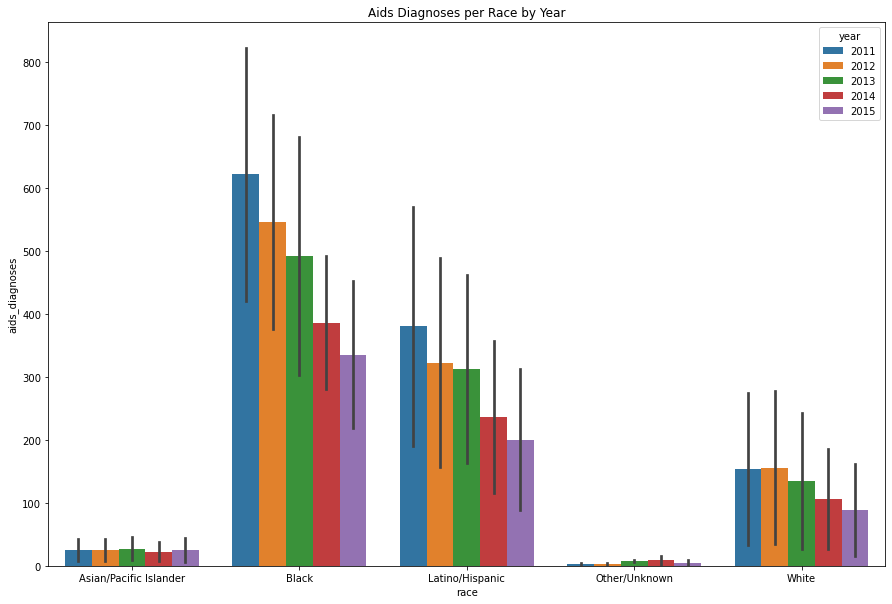

In [25]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="year", data=df_all_race)
plt.title("Aids Diagnoses per Race by Year")

Text(0.5, 1.0, 'Aids Diagnoses per Year by Race ')

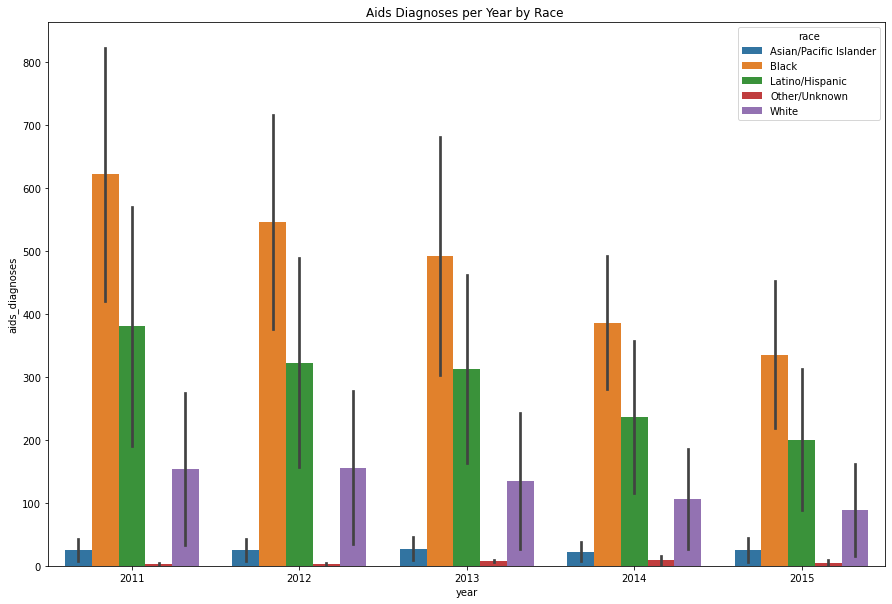

In [22]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="year", y="aids_diagnoses", hue ="race", data=df_all_race)
plt.title("Aids Diagnoses per Year by Race ")

Text(0.5, 1.0, 'HIV Diagnoses per Race by Year')

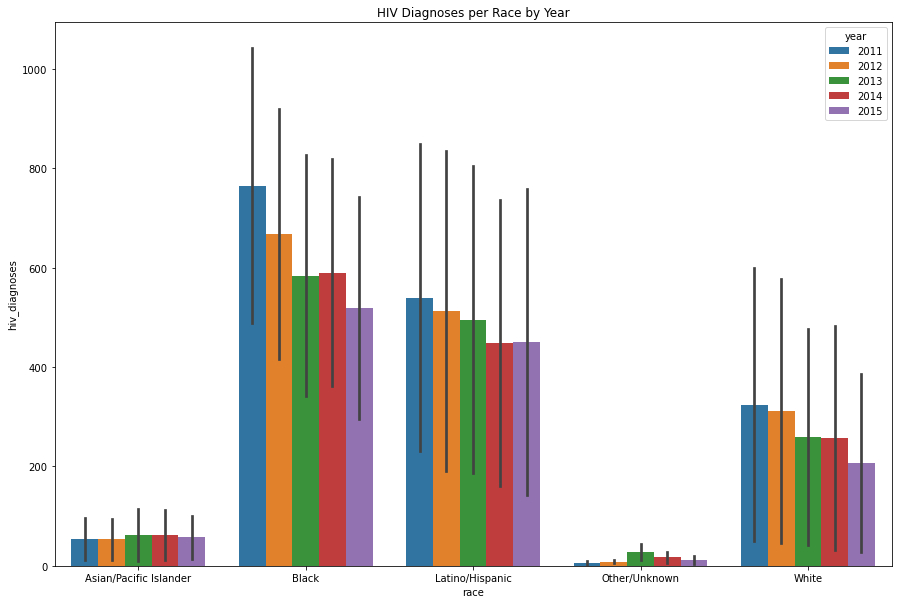

In [23]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="hiv_diagnoses", hue ="year", data=df_all_race)
plt.title("HIV Diagnoses per Race by Year")

Text(0.5, 1.0, 'HIV Diagnoses per Year by Race')

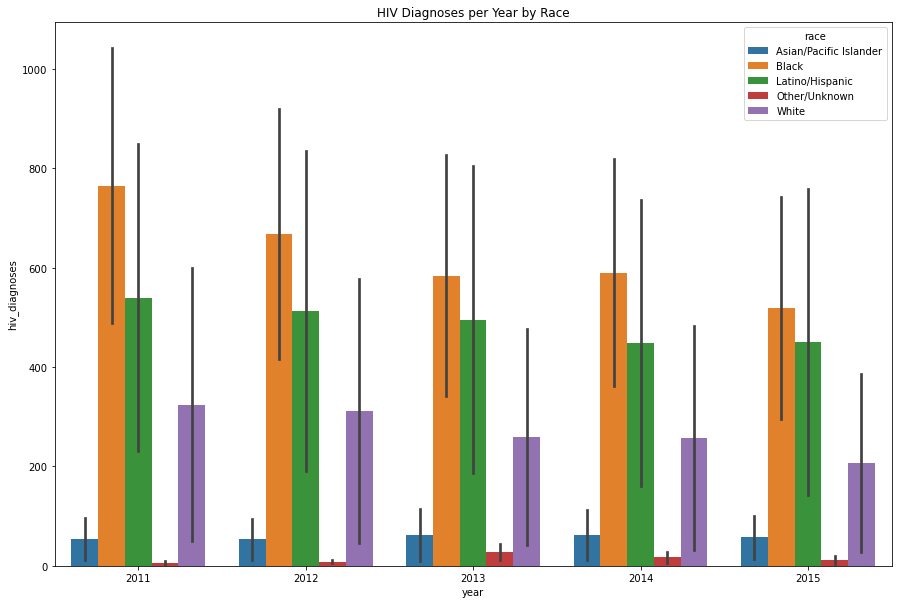

In [24]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="year", y="hiv_diagnoses", hue ="race", data=df_all_race)
plt.title("HIV Diagnoses per Year by Race")

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
14,2011,All,All,Female,All,White,50,4.0,8,54,33,2.6,0.1,77,54,13.8,5.6,8.2
25,2011,All,All,Male,All,White,599,51.7,91,72,274,23.6,1.1,82,276,10.5,2.9,7.6


,year,race,hiv_diagnoses
0,2011,Asian/Pacific Islander,108
1,2011,Black,1530
2,2011,Latino/Hispanic,1080
3,2011,Other/Unknown,12
4,2011,White,649


,year,hiv_diagnoses
0,2011,3379


Text(0.5, 1.0, '2011 - Aids Diagnoses per Race by Gender')

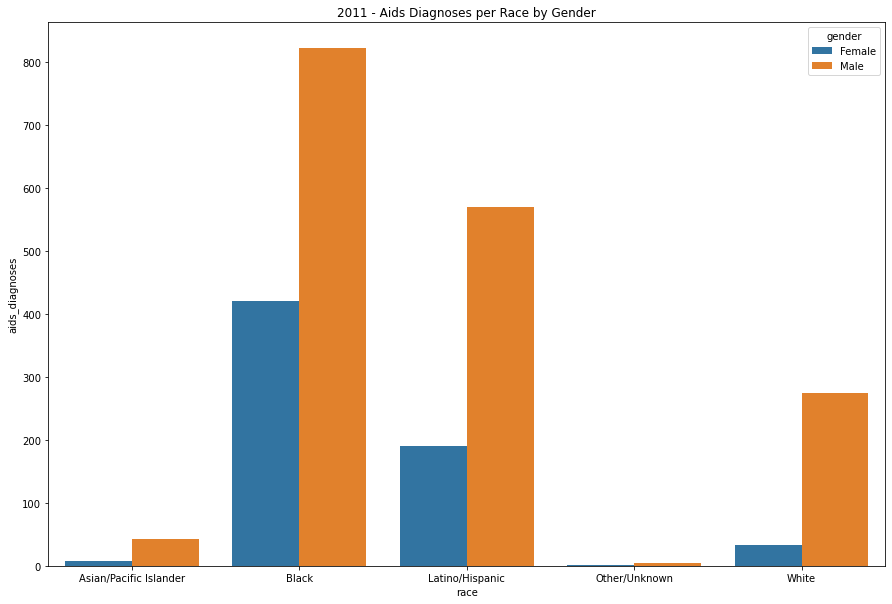

In [25]:
df_all_race_11 = df_raw.query('year =="2011" & borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race_11.query('race =="White"' )
df_all_race_11.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race_11.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_11)
plt.title("2011 - Aids Diagnoses per Race by Gender")

Text(0.5, 1.0, '2011 - Aids Diagnoses per Gender by Race')

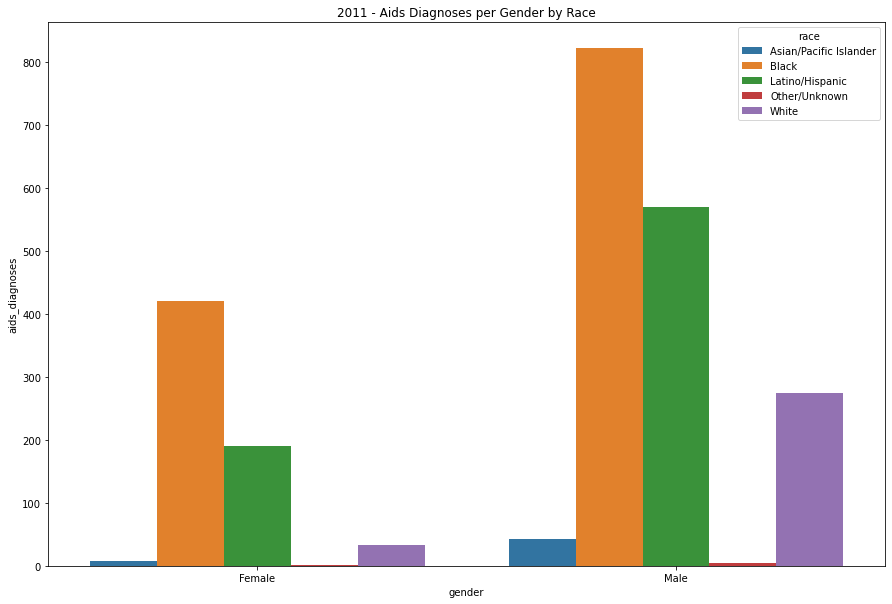

In [26]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="gender", y="aids_diagnoses", hue ="race", data=df_all_race_11)
plt.title("2011 - Aids Diagnoses per Gender by Race")

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
1215,2012,All,All,Female,All,White,45,3.6,8,80,34,2.7,0.1,80,44,11.6,4.4,7.2
1226,2012,All,All,Male,All,White,577,49.6,85,69,277,23.8,1.2,85,256,8.0,2.6,5.4


,year,race,hiv_diagnoses
0,2012,Asian/Pacific Islander,107
1,2012,Black,1336
2,2012,Latino/Hispanic,1024
3,2012,Other/Unknown,17
4,2012,White,622


,year,hiv_diagnoses
0,2012,3106


Text(0.5, 1.0, '2012 - Aids Diagnoses per Race by Gender')

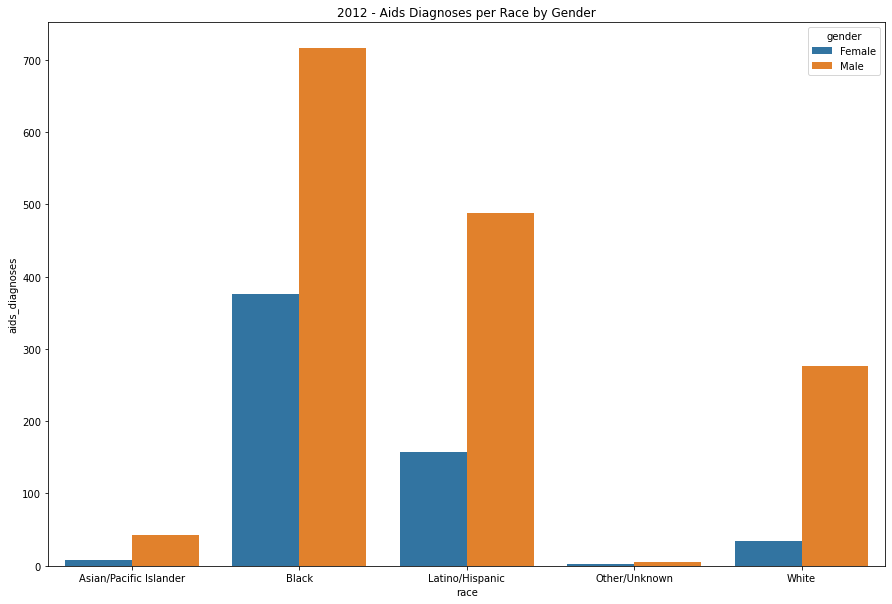

In [27]:
df_all_race_12 = df_raw.query('year =="2012" & borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race_12.query('race =="White"' )
df_all_race_12.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race_12.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_12)
plt.title("2012 - Aids Diagnoses per Race by Gender")

Text(0.5, 1.0, 'Aids_diagnoses')

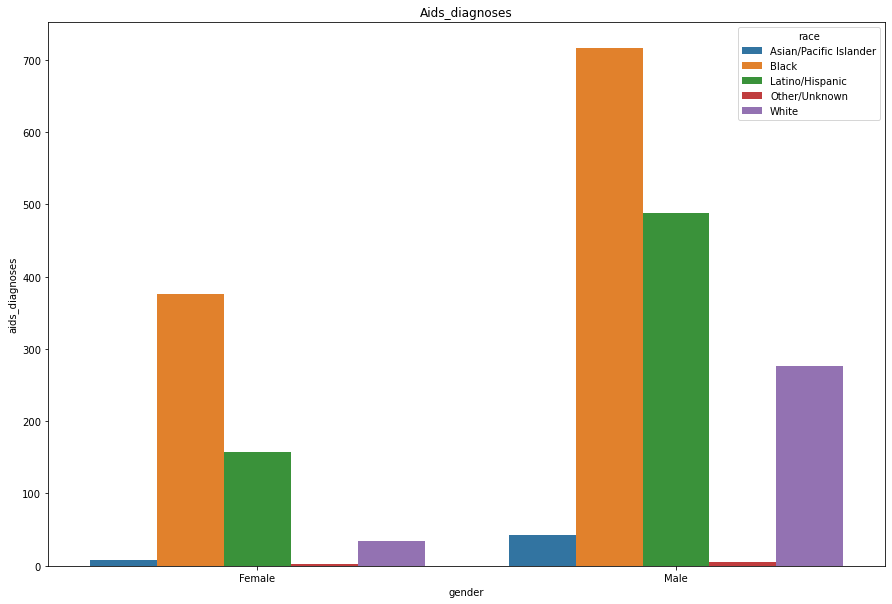

In [28]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="gender", y="aids_diagnoses", hue ="race", data=df_all_race_12)
plt.title("Aids_diagnoses")

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
2416,2013,All,All,Female,All,White,41,3.3,8,66,26,2.1,0.1,83,47,15.1,6.4,8.7
2427,2013,All,All,Male,All,White,477,41.0,78,69,243,20.9,1.2,88,239,7.0,1.9,5.1


,year,race,hiv_diagnoses
0,2013,Asian/Pacific Islander,124
1,2013,Black,1168
2,2013,Latino/Hispanic,991
3,2013,Other/Unknown,55
4,2013,White,518


,year,hiv_diagnoses
0,2013,2856


Text(0.5, 1.0, '2013 - Aids Diagnoses per Race by Gender')

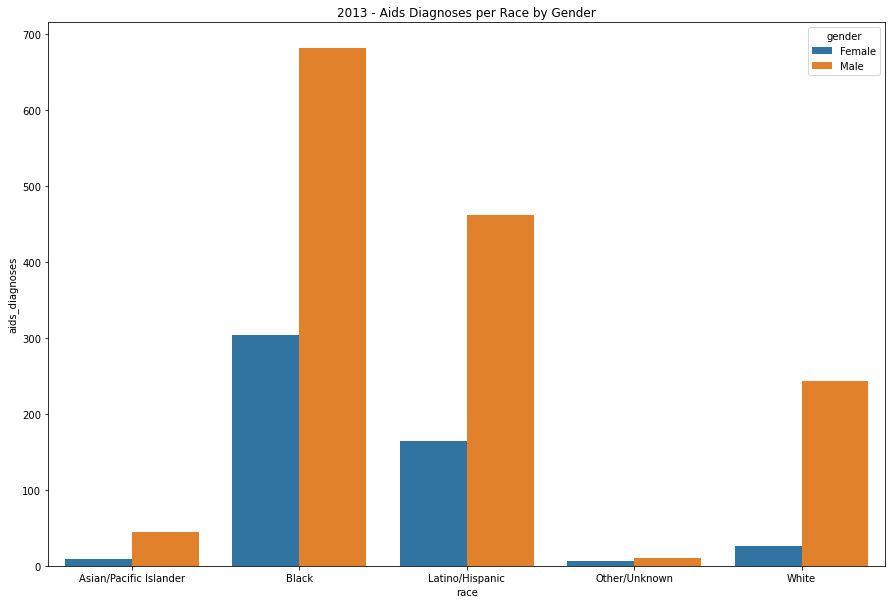

In [29]:
df_all_race_13 = df_raw.query('year =="2013" & borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race_13.query('race =="White"' )
df_all_race_13.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race_13.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_13)
plt.title("2013 - Aids Diagnoses per Race by Gender")

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
3617,2014,All,All,Female,All,White,32,2.6,8,75,26,2.1,0.1,86,38,10.1,2.4,7.7
3628,2014,All,All,Male,All,White,483,41.5,73,73,185,15.9,1.2,90,234,6.5,1.7,4.8


,year,race,hiv_diagnoses
0,2014,Asian/Pacific Islander,123
1,2014,Black,1180
2,2014,Latino/Hispanic,897
3,2014,Other/Unknown,34
4,2014,White,515


,year,hiv_diagnoses
0,2014,2749


Text(0.5, 1.0, '2014 - Aids Diagnoses per Race by Gender')

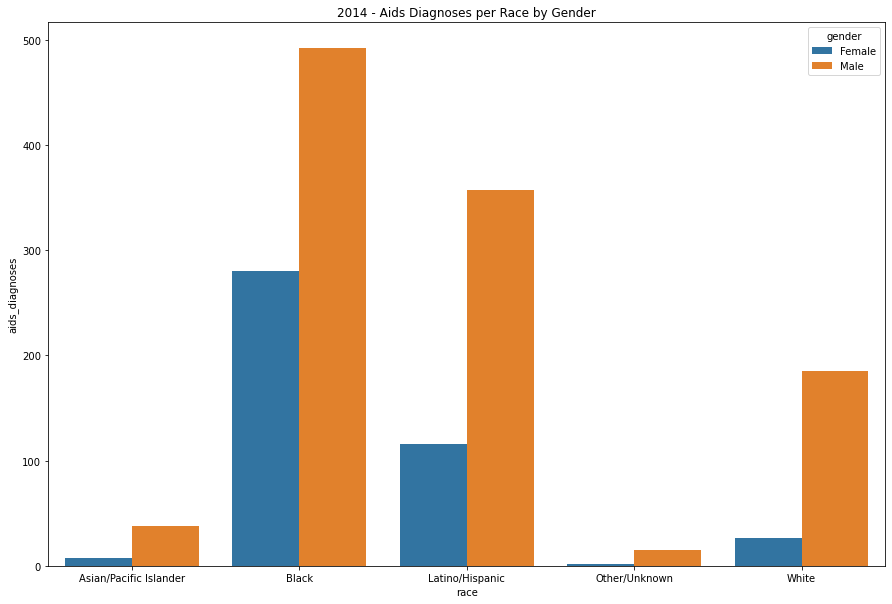

In [30]:
df_all_race_14 = df_raw.query('year =="2014" & borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race_14.query('race =="White"' )
df_all_race_14.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race_14.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_14)
plt.title("2014 - Aids Diagnoses per Race by Gender")

Text(0.5, 1.0, '2014 - Aids Diagnoses per Gender by Race')

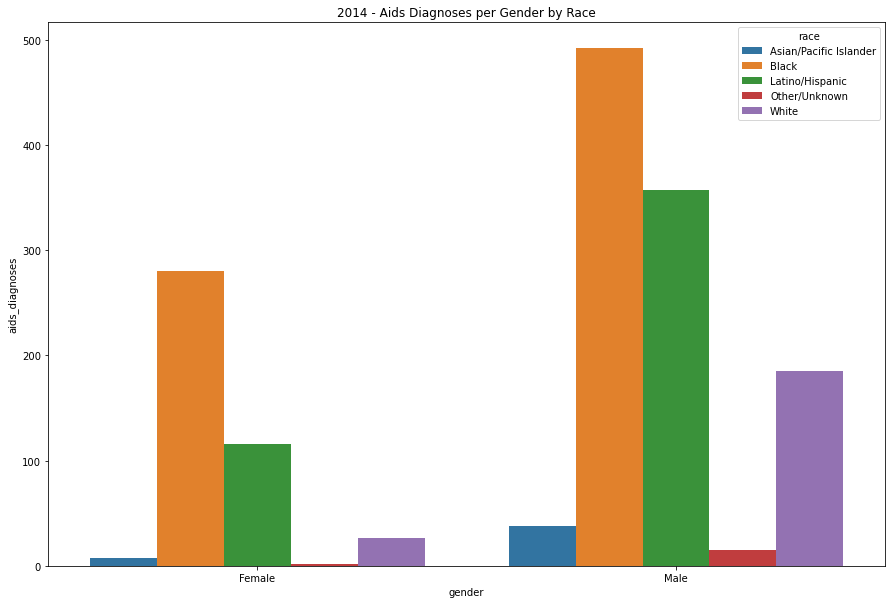

In [31]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="gender", y="aids_diagnoses", hue ="race", data=df_all_race_14)
plt.title("2014 - Aids Diagnoses per Gender by Race")

,year,borough,uhf,gender,age,race,hiv_diagnoses,hiv_diagnosis_rate,concurrent_diagnoses,pct_linked_to_care_within_3_months,aids_diagnoses,aids_diagnosis_rate,plwdhi_prevalence,pct_viral_suppression,deaths,death_rate,hiv-related_death_rate,non-hiv-related_death_rate
4818,2015,All,All,Female,All,White,27,2.2,3,48,15,1.2,0.1,87,43,10.2,99999.0,99999.0
4829,2015,All,All,Male,All,White,386,33.2,57,76,161,13.9,1.2,91,213,6.3,99999.0,99999.0


,year,race,hiv_diagnoses
0,2015,Asian/Pacific Islander,115
1,2015,Black,1038
2,2015,Latino/Hispanic,901
3,2015,Other/Unknown,23
4,2015,White,413


,year,hiv_diagnoses
0,2015,2490


Text(0.5, 1.0, '2015 - Aids Diagnoses per Race by Gender')

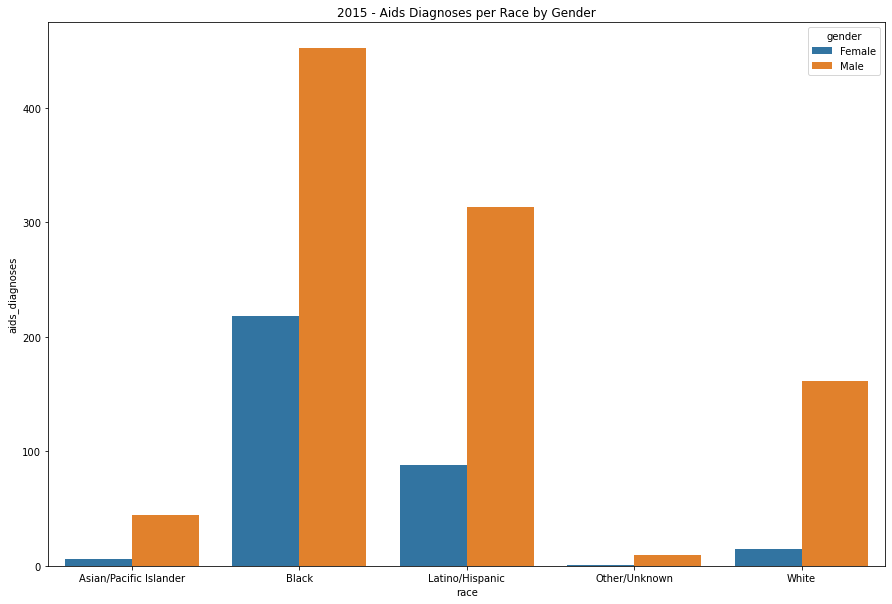

In [32]:
df_all_race_15 = df_raw.query('year =="2015" & borough =="All" & uhf=="All" & gender!="All" & age=="All" & race!="All"')
df_all_race_15.query('race =="White"' )
df_all_race_15.groupby(['year','race'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})
df_all_race_15.groupby(['year'], as_index=False)['hiv_diagnoses'].sum() #.rename(columns={'hiv_diagnoses':'hiv_diagnoses'})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_15)
plt.title("2015 - Aids Diagnoses per Race by Gender")

Text(0.5, 1.0, '2015 - Aids Diagnoses per Gender by Race')

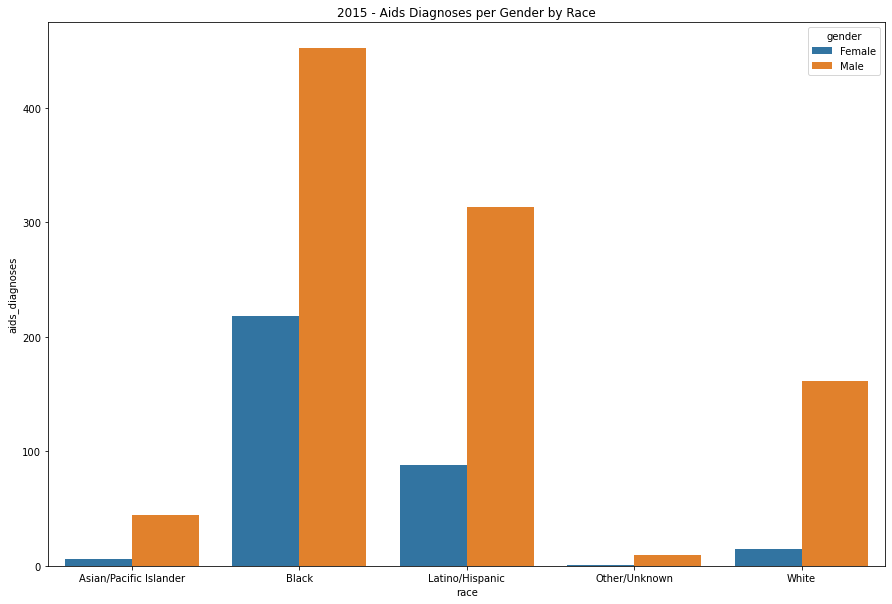

In [33]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="race", y="aids_diagnoses", hue ="gender", data=df_all_race_15)
plt.title("2015 - Aids Diagnoses per Gender by Race")

In [34]:
df_all_death_rate = df_all_boro.groupby(['borough','year'], as_index=False)['death_rate'].sum()
df_all_hiv_related_death_rate = df_all_boro.query('year in ["2011", "2012","2013", "2014"]').groupby(['borough','year'], as_index=False)['hiv-related_death_rate'].sum()
df_all_non_hiv_related_death_rate = df_all_boro.query('year in ["2011", "2012","2013", "2014"]').groupby(['borough','year'], as_index=False)['non-hiv-related_death_rate'].sum()

In [66]:
df_all_death_rate.head(5)
df_all_hiv_related_death_rate.head(5)
df_all_non_hiv_related_death_rate.head(5)


,borough,year,death_rate
0,Bronx,2011,15.0
1,Bronx,2012,13.3
2,Bronx,2013,12.4
3,Bronx,2014,12.1
4,Bronx,2015,10.7


,borough,year,hiv-related_death_rate
0,Bronx,2011,6.9
1,Bronx,2012,5.0
2,Bronx,2013,4.5
3,Bronx,2014,3.7
4,Brooklyn,2011,6.2


,borough,year,non-hiv-related_death_rate
0,Bronx,2011,8.1
1,Bronx,2012,8.3
2,Bronx,2013,7.9
3,Bronx,2014,8.4
4,Brooklyn,2011,8.3


Text(0.5, 1.0, 'Death Rate by Year')

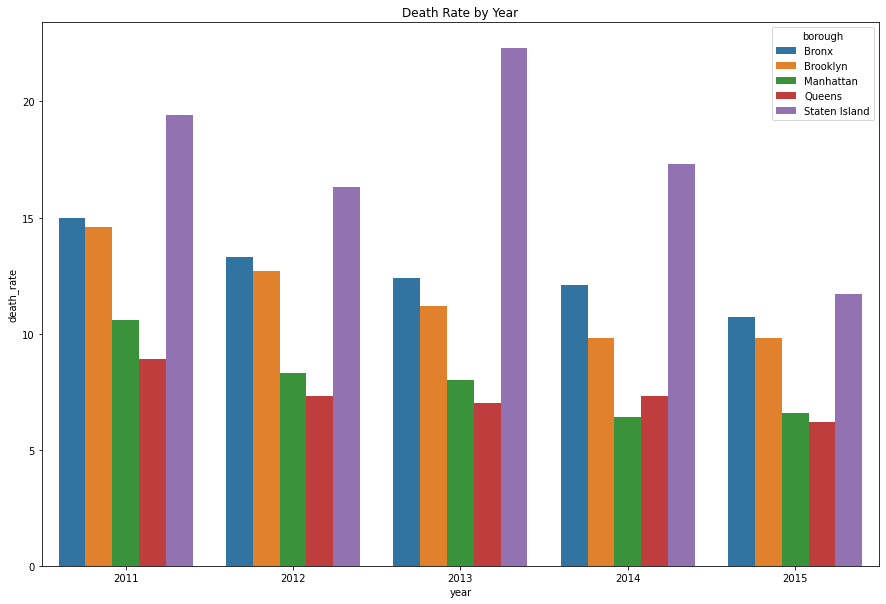

In [36]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="year", y="death_rate", hue ="borough", data=df_all_death_rate)
plt.title("Death Rate by Year")

Text(0.5, 1.0, 'Hiv Related Death Rate by Year')

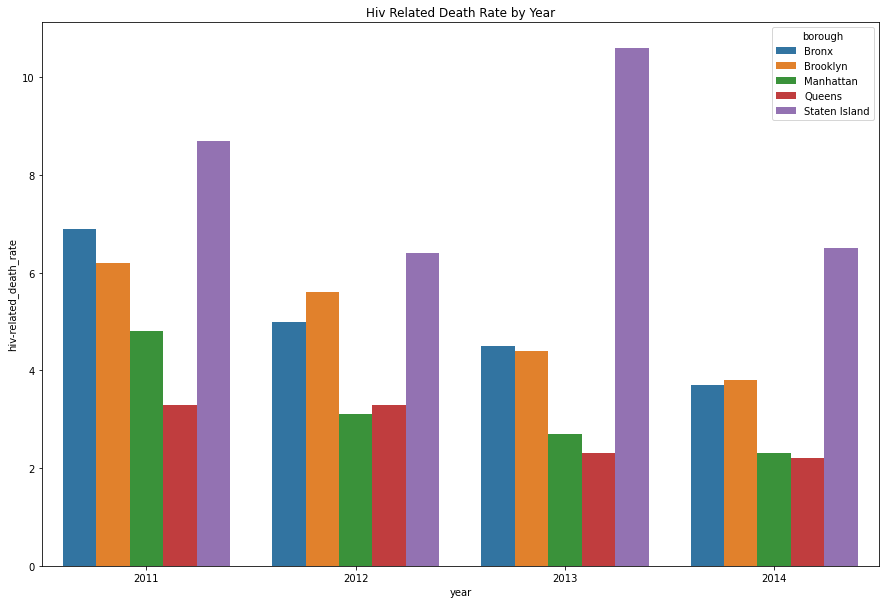

In [37]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="year", y="hiv-related_death_rate", hue ="borough", data=df_all_hiv_related_death_rate)
plt.title("Hiv Related Death Rate by Year")

Text(0.5, 1.0, 'Non Hiv Related Death Rate by Year')

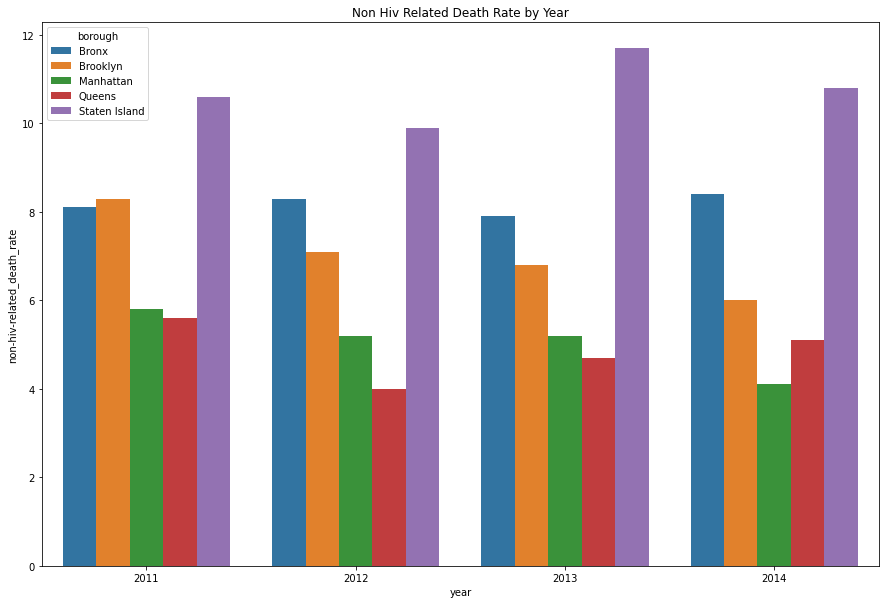

In [38]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="year", y="non-hiv-related_death_rate", hue ="borough", data=df_all_non_hiv_related_death_rate)
plt.title("Non Hiv Related Death Rate by Year")

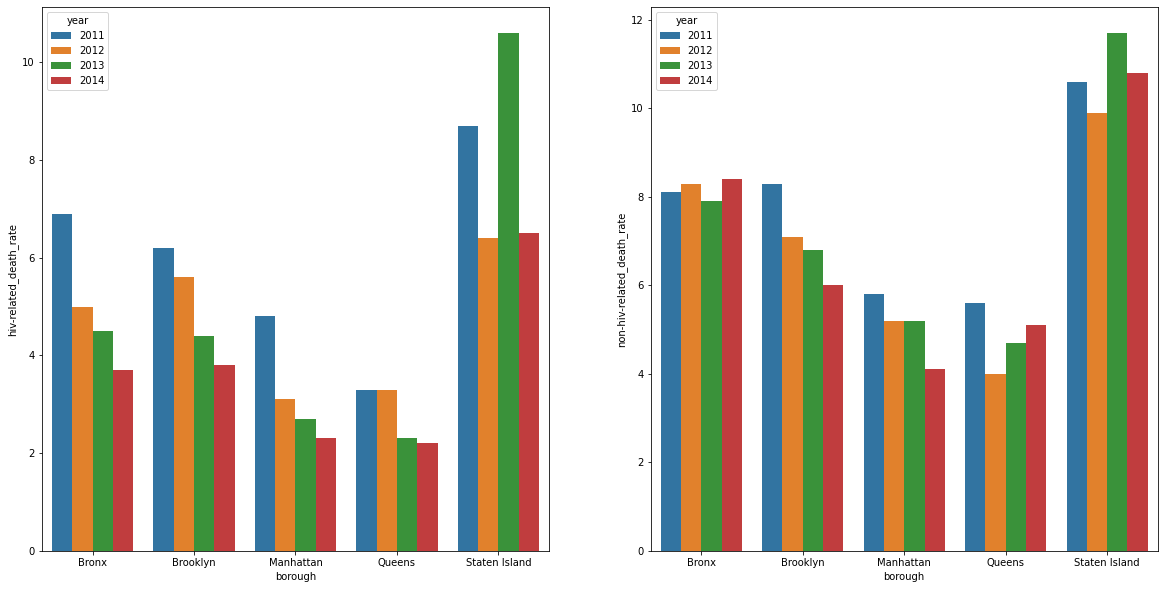

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.barplot(x="borough",  y="hiv-related_death_rate", hue="year",  data=df_all_hiv_related_death_rate, ax=axes[0])
sns.barplot(x="borough",  y="non-hiv-related_death_rate", hue="year",  data=df_all_non_hiv_related_death_rate, ax=axes[1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})

In [40]:
df_all_boro_aid_diag = df_all_boro.groupby(['borough','year'], as_index=False)['aids_diagnoses'].sum()
df_all_death_rate = df_all_boro.groupby(['borough','year'], as_index=False)['death_rate'].sum()
df_all_hiv_related_death_rate = df_all_boro.query('year in ["2011", "2012","2013", "2014"]').groupby(['borough','year'], as_index=False)['hiv-related_death_rate'].sum()
df_all_non_hiv_related_death_rate = df_all_boro.query('year in ["2011", "2012","2013", "2014"]').groupby(['borough','year'], as_index=False)['non-hiv-related_death_rate'].sum()

Text(0.5, 1.0, 'Aids Diagnoses per Race by Year')

Text(0.5, 1.0, 'Death Rate per Race by Year')

Text(0.5, 1.0, 'Hiv Related Death Rate per Race by Year')

Text(0.5, 1.0, 'Non-Hiv Related Death Rate per Race by Year')

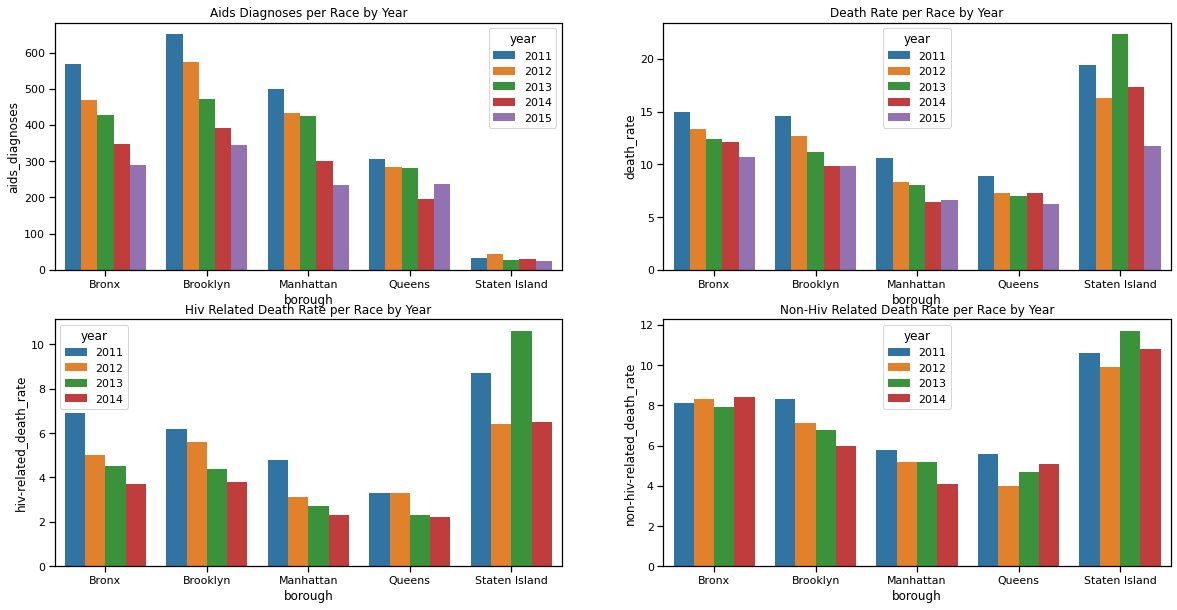

In [41]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(20,10))
sns.barplot(x="borough",  y="aids_diagnoses", hue="year",  data=df_all_boro_aid_diag, ax=axes[0,0]).set_title("Aids Diagnoses per Race by Year")
sns.barplot(x="borough",  y="death_rate", hue="year",  data=df_all_death_rate, ax=axes[0,1]).set_title("Death Rate per Race by Year")
sns.barplot(x="borough",  y="hiv-related_death_rate", hue="year",  data=df_all_hiv_related_death_rate, ax=axes[1,0]).set_title("Hiv Related Death Rate per Race by Year")
sns.barplot(x="borough",  y="non-hiv-related_death_rate", hue="year",  data=df_all_non_hiv_related_death_rate, ax=axes[1,1]).set_title("Non-Hiv Related Death Rate per Race by Year")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})

In [42]:
df_race_death_rate = df_all_race.groupby(['race','year'], as_index=False)['death_rate'].sum()
df_race_hiv_related_death_rate = df_all_race.query('year in ["2011", "2012","2013", "2014"]').groupby(['race','year'], as_index=False)['hiv-related_death_rate'].sum()
df_race_non_hiv_related_death_rate = df_all_race.query('year in ["2011", "2012","2013", "2014"]').groupby(['race','year'], as_index=False)['non-hiv-related_death_rate'].sum()

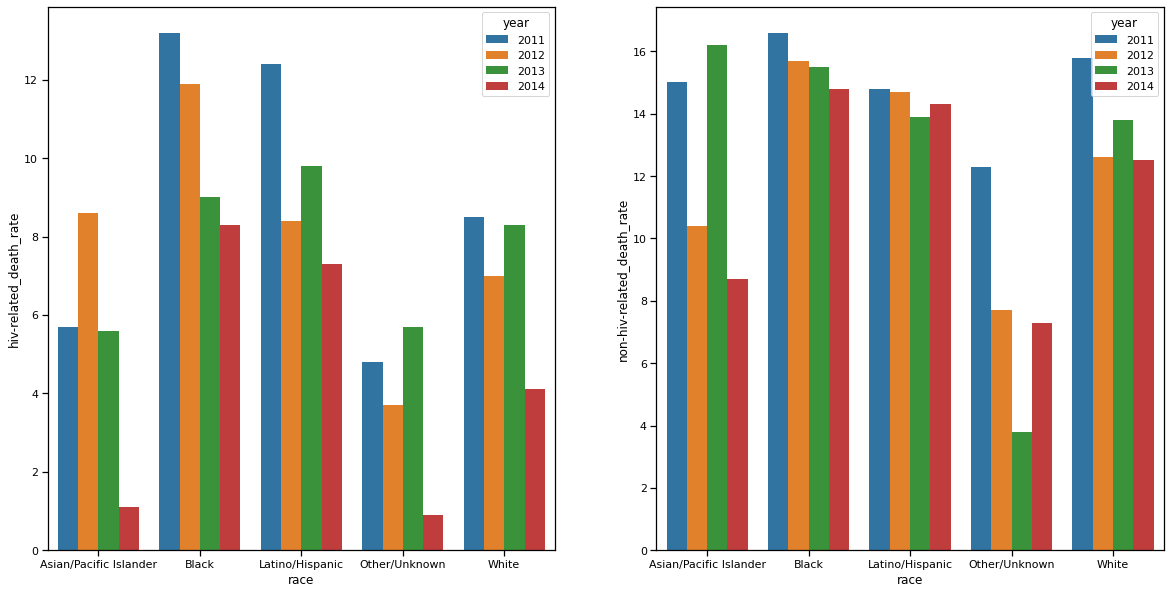

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.barplot(x="race",  y="hiv-related_death_rate", hue="year",  data=df_race_hiv_related_death_rate, ax=axes[0])
sns.barplot(x="race",  y="non-hiv-related_death_rate", hue="year",  data=df_race_non_hiv_related_death_rate, ax=axes[1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})

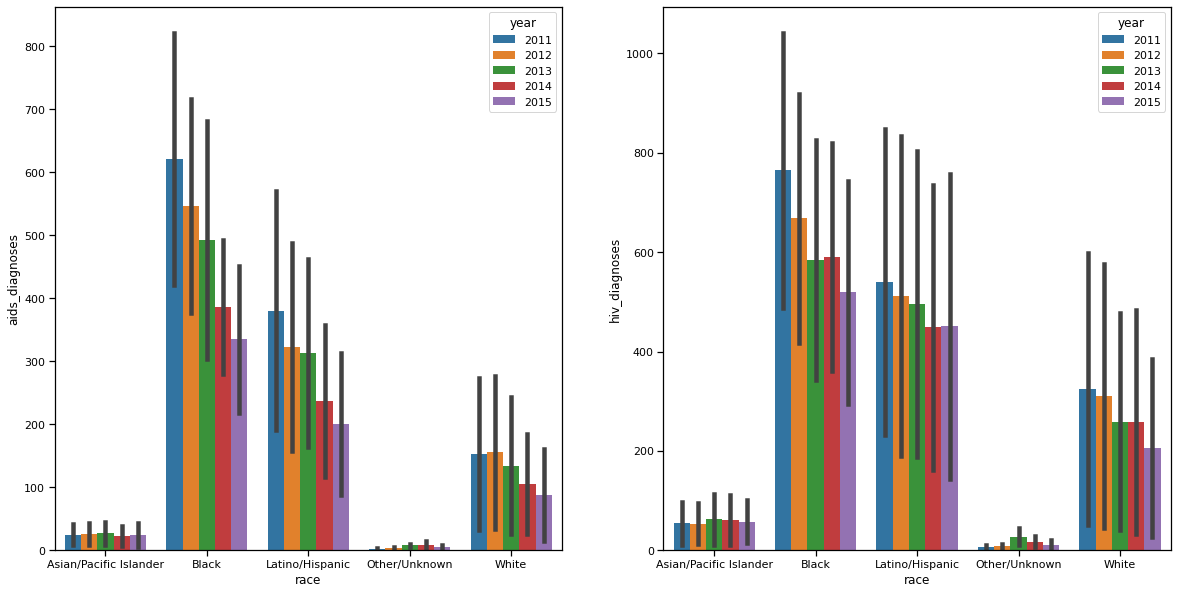

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.barplot(x="race",  y="aids_diagnoses", hue="year",  data=df_all_race, ax=axes[0])
sns.barplot(x="race",  y="hiv_diagnoses", hue="year",  data=df_all_race, ax=axes[1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})


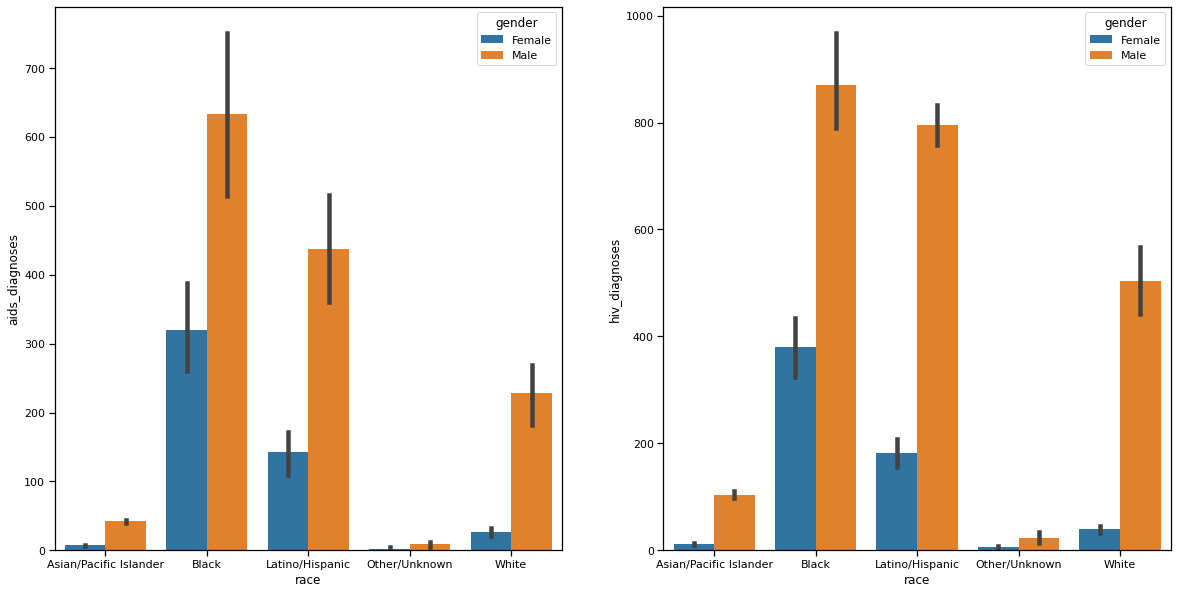

In [45]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.barplot(x="race",  y="aids_diagnoses", hue="gender",  data=df_all_race, ax=axes[0])
sns.barplot(x="race",  y="hiv_diagnoses", hue="gender",  data=df_all_race, ax=axes[1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})

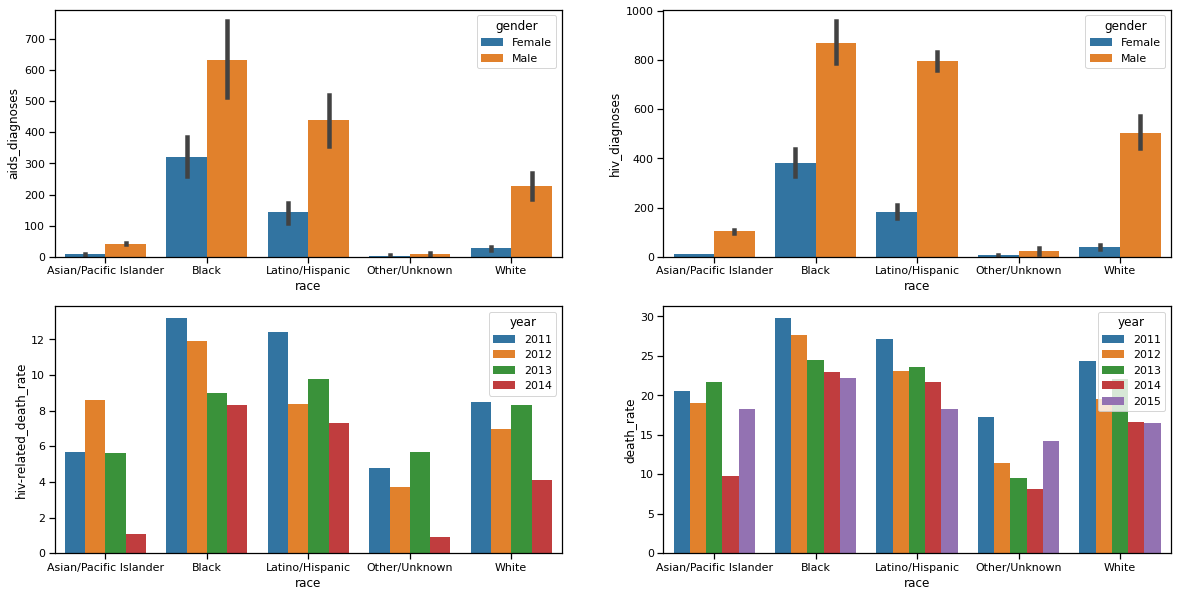

In [46]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(20,10))
sns.barplot(x="race",  y="aids_diagnoses", hue="gender",  data=df_all_race, ax=axes[0,0])
sns.barplot(x="race",  y="hiv_diagnoses", hue="gender",  data=df_all_race, ax=axes[0,1])
sns.barplot(x="race",  y="hiv-related_death_rate", hue="year",  data=df_race_hiv_related_death_rate, ax=axes[1,0])
sns.barplot(x="race",  y="death_rate", hue="year",  data=df_race_death_rate, ax=axes[1,1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})

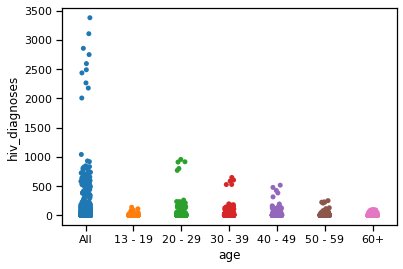

In [47]:
#Review of age (Mannie)
sns.stripplot(x="age", y="hiv_diagnoses", data=df_raw)
#finding there is a higher degree of HIV diagnosis with Males compared to Females

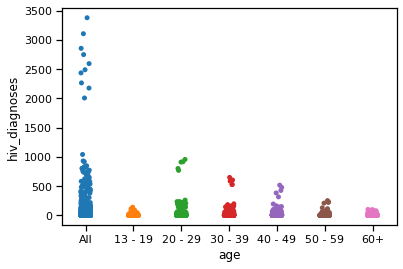

In [48]:
sns.stripplot(x="age", y="hiv_diagnoses", data=df_raw)
#finding there is a higher degree of HIV diagnosis with Males compared to Females

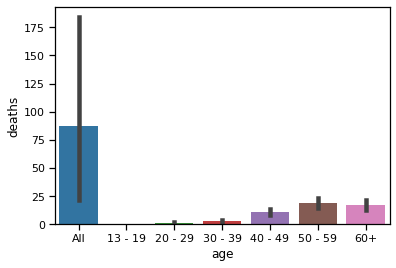

In [49]:
sns.barplot(x="age", y="deaths", data=df_raw)
#Death rate goes up as age goes up, peaking at 50-59 and beginning to decrease at 60+

C:\Users\constae\Miniconda3\envs\minimal_ds\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



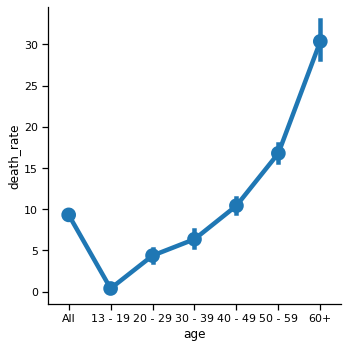

In [50]:
sns.factorplot(x="age", y="death_rate", data=df_raw)
#Inverse relationship with hiv dx by age, showing that death rate is higher for those who are older.

C:\Users\constae\Miniconda3\envs\minimal_ds\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



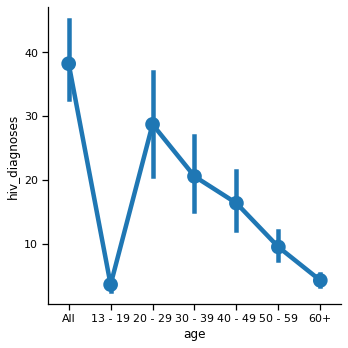

In [51]:
sns.factorplot(x="age", y="hiv_diagnoses", data=df_raw)
#Another visusal useful for comparing the next graph on linkage to care

C:\Users\constae\Miniconda3\envs\minimal_ds\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



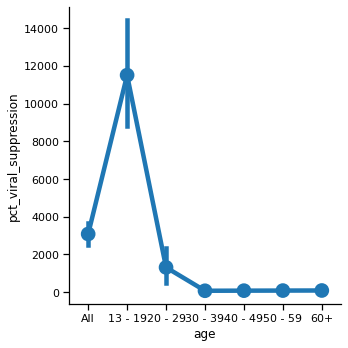

In [52]:
sns.factorplot(x="age", y="pct_viral_suppression", data=df_raw)

C:\Users\constae\Miniconda3\envs\minimal_ds\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



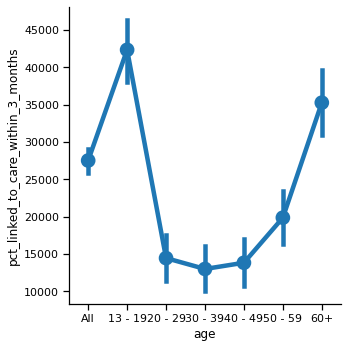

In [53]:
sns.factorplot(x="age", y="pct_linked_to_care_within_3_months", data=df_raw)

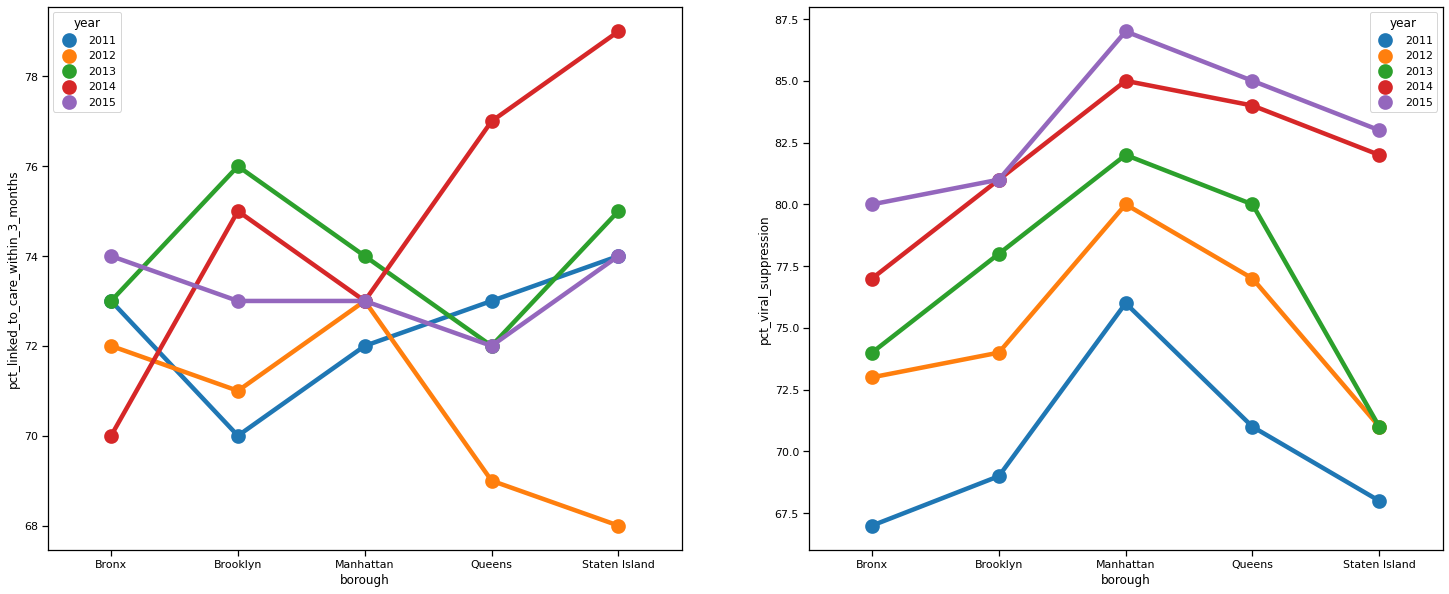

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(25,10))
sns.pointplot(x="borough",  y="pct_linked_to_care_within_3_months",  hue="year", data=df_all_boro, ax=axes[0])
sns.pointplot(x="borough",  y="pct_viral_suppression",  hue="year", data=df_all_boro,ax=axes[1])
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth":2.5})
plt.show()

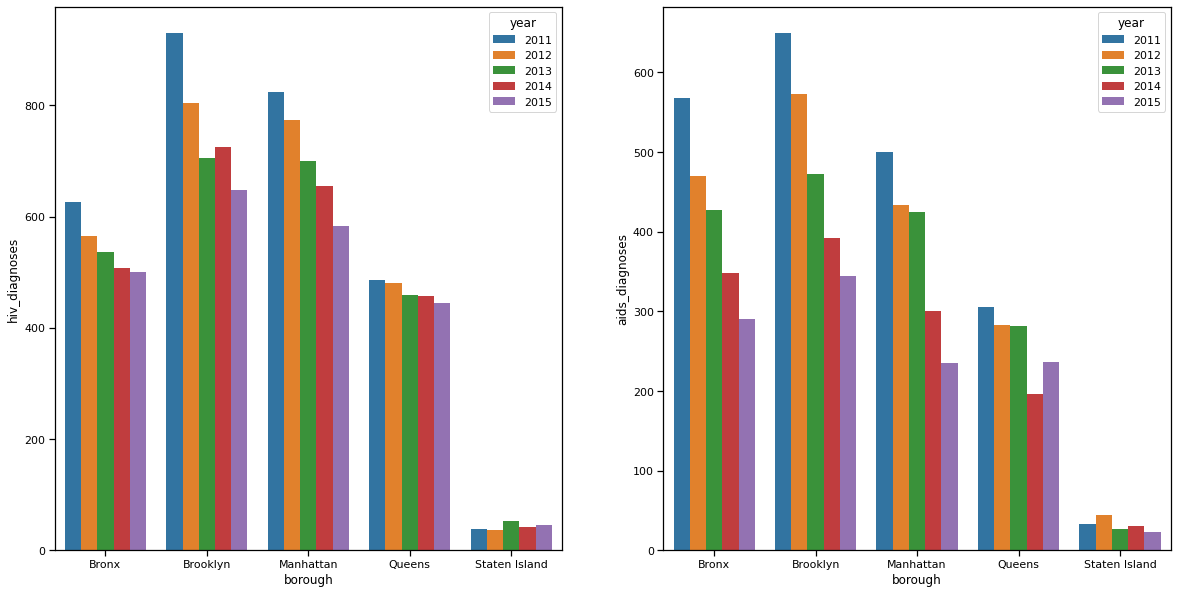

In [58]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.barplot(x="borough",  y="hiv_diagnoses", hue="year",  data=df_all_boro, ax=axes[0])
sns.barplot(x="borough",  y="aids_diagnoses", hue="year",  data=df_all_boro, ax=axes[1])
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})



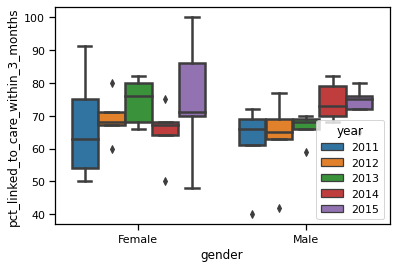

In [59]:
sns.boxplot(x="gender", y="pct_linked_to_care_within_3_months", hue ="year", data=df_all_race)

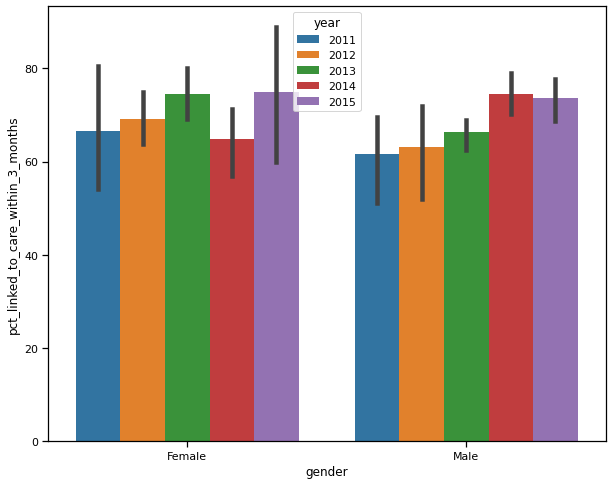

In [60]:
#Linkage to Care within 3 Months
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="gender", y="pct_linked_to_care_within_3_months", hue ="year", data=df_all_race)
#Over the 5-year period, Women seem to be linked to Care much better than men within the first 3-months of HiV Diagnosis

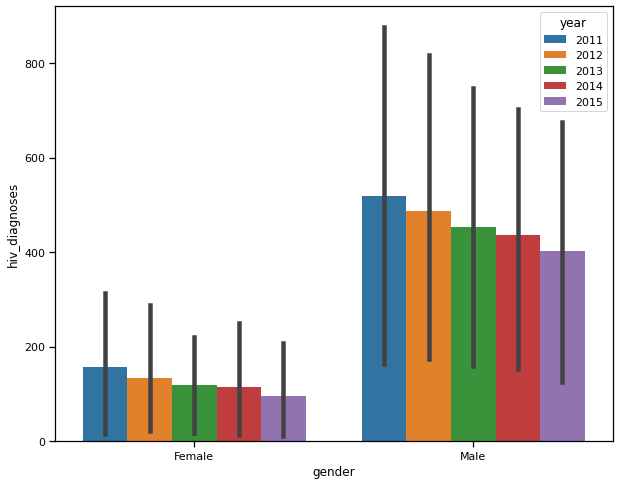

In [61]:
#HIV Diagnosis by Gender for all Years
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="gender", y="hiv_diagnoses", hue ="year", data=df_all_race)